Question 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def first_order_forward_difference(x, y):
    h = np.diff(x)
    dy_dx = np.diff(y) / h
    return np.append(dy_dx, np.nan)

def second_order_central_difference(x, y):
    h = np.diff(x)
    dy_dx = (y[2:] - y[:-2]) / (2 * h[1:])
    dy_dx_full = np.append([np.nan], dy_dx)
    return np.append(dy_dx_full, np.nan)

def first_order_forward_difference_second_derivative(x, y):
    h = np.diff(x)
    d2y_dx2 = np.diff(np.diff(y)) / h[:-1]
    d2y_dx2_full = np.append(d2y_dx2, [np.nan, np.nan])
    return d2y_dx2_full

def second_order_central_difference_second_derivative(x, y):
    h = np.diff(x)
    d2y_dx2 = (y[2:] - 2 * y[1:-1] + y[:-2]) / (h[1:]**2)
    d2y_dx2_full = np.append([np.nan], d2y_dx2)
    return np.append(d2y_dx2_full, np.nan)

def composite_trapezoidal(x, y):
    h = np.diff(x)
    integral = np.sum(h * (y[:-1] + y[1:]) / 2)
    return integral

def composite_simpsons(x, y):
    if len(x) % 2 == 0:
        raise ValueError("Simpson's rule requires an odd number of points.")

    h = (x[-1] - x[0]) / (len(x) - 1)
    integral = h / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]))
    return integral


In [17]:
t = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])
x = np.array([0, 0.7, 1.8, 3.4, 5.1, 6.3, 7.3, 8.0, 8.4])

dy_dx = second_order_central_difference(t, x)
d2y_dx2 = second_order_central_difference_second_derivative(t, x)

dy_dx_forward = first_order_forward_difference(t, x)
d2y_dx2_forward = first_order_forward_difference_second_derivative(t, x)

idx_10 = np.where(t == 10)[0][0]
velocity_at_10 = dy_dx[idx_10]
acceleration_at_10 = d2y_dx2[idx_10]

t_interp = np.interp(5, t, x)

velocity_at_5 = dy_dx_forward[2]
acceleration_at_5 = d2y_dx2_forward[2]

print(f"Velocity at t = 10s: {velocity_at_10:.2f} m/s")
print(f"Acceleration at t = 10s: {acceleration_at_10:.2f} m/s²")
print(f"Velocity at t = 5s: {velocity_at_5:.2f} m/s")
print(f"Acceleration at t = 5s: {acceleration_at_5:.2f} m/s²")


Velocity at t = 10s: 0.55 m/s
Acceleration at t = 10s: -0.05 m/s²
Velocity at t = 5s: 0.80 m/s
Acceleration at t = 5s: 0.05 m/s²


In [18]:
x = np.array([0.6, 1.5, 1.6, 2.5, 3.5])
f_x = np.array([0.9036, 0.3734, 0.3261, 0.08422, 0.01596])

def forward_finite_difference(x, y):
    h = np.diff(x)
    dy_dx = np.diff(y) / h
    return dy_dx

numerical_derivatives = forward_finite_difference(x, f_x)

def true_derivative(x):
    return np.exp(-2 * x) * (5 - 10 * x)

analytical_derivatives = true_derivative(x[:-1])

print("x =", x[:-1])
print("Numerical derivatives:", numerical_derivatives)
print("Analytical derivatives:", analytical_derivatives)

absolute_error = np.abs(numerical_derivatives - analytical_derivatives)
print("Absolute error:", absolute_error)


x = [0.6 1.5 1.6 2.5]
Numerical derivatives: [-0.58911111 -0.473      -0.26875556 -0.06826   ]
Analytical derivatives: [-0.30119421 -0.49787068 -0.44838424 -0.13475894]
Absolute error: [0.2879169  0.02487068 0.17962869 0.06649894]


Composite Trapezoidal Integral: 335.9705324411173
Composite Simpson's 1/3 Integral: 335.9625298035534
Scipy Quad Integral: 335.9625300616258


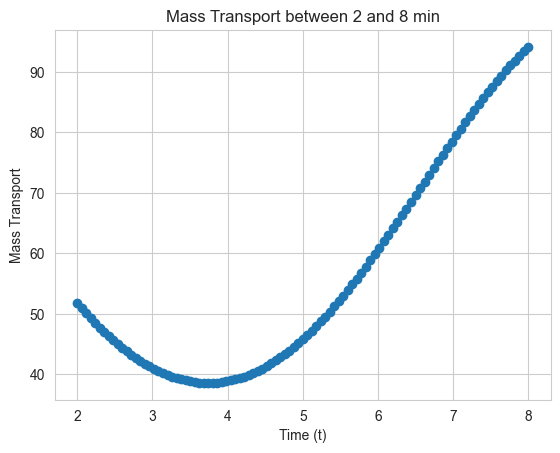

In [21]:
def mass(t):
    return (9 + 5 * np.cos(0.4 * t) ** 2) * (5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t))

t1 = 2
t2 = 8

num_points = 101
t = np.linspace(t1, t2, num_points)
y = mass(t)

trapezoidal_integral = composite_trapezoidal(t, y)
simpsons_integral = composite_simpsons(t, y)
quad_integral, quad_error = quad(mass, t1, t2)

print("Composite Trapezoidal Integral:", trapezoidal_integral)
print("Composite Simpson's 1/3 Integral:", simpsons_integral)
print("Scipy Quad Integral:", quad_integral)

plt.plot(t, y, 'o-', label='Q(t) * c(t)')
plt.xlabel('Time (t)')
plt.ylabel('Mass Transport')
plt.title('Mass Transport between 2 and 8 min')
plt.show()


In [20]:
def f(x):
    return x * np.exp(-x)

exact_value = 1 - 2 / np.exp(1)

subintervals = [5, 10, 20, 50, 100]

trapezoidal_results = []
simpsons_results = []

for n in subintervals:
    x = np.linspace(0, 1, n + 1)
    y = f(x)

    trapezoidal_integral = composite_trapezoidal(x, y)
    trapezoidal_results.append(trapezoidal_integral)

    if (n + 1) % 2 != 0:
        simpsons_integral = composite_simpsons(x, y)
        simpsons_results.append(simpsons_integral)

quad_integral, quad_error = quad(f, 0, 1)

print("Exact Value:", exact_value)
print("Scipy Quad Integral:", quad_integral)

print("Composite Trapezoidal Results:")
for i, res in zip(subintervals, trapezoidal_results):
    print(f"  {i} subintervals: {res}")

print("Composite Simpson's 1/3 Results:")
for i, res in zip([s for s in subintervals if (s + 1) % 2 != 0], simpsons_results):
    print(f"  {i} subintervals: {res}")


Exact Value: 0.26424111765711533
Scipy Quad Integral: 0.26424111765711533
Composite Trapezoidal Results:
  5 subintervals: 0.2609128085131533
  10 subintervals: 0.26340809868507203
  20 subintervals: 0.2640328039768298
  50 subintervals: 0.26420778482693924
  100 subintervals: 0.2642327843552297
Composite Simpson's 1/3 Results:
  10 subintervals: 0.2642398620757116
  20 subintervals: 0.2642410390740825
  50 subintervals: 0.26424111564460595
  100 subintervals: 0.26424111753132656
